In [87]:
import numpy as np
import tensorflow as tf

from aiwithtf.utils.viz import visualize_graph
from aiwithtf.utils import check_tf

check_tf(tf)

Using TensorFlow 1.4.0


## The Computation Graph

Output: 8


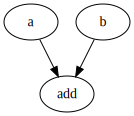

In [2]:
graph1 = tf.Graph()

with graph1.as_default():
    a = tf.constant(5, name='a')
    b = tf.constant(3, name='b')
    c = a + b
    
    with tf.Session() as sess:
        print('Output: {}'.format(sess.run(c)))
        
visualize_graph(graph1)

Output: [8 9]


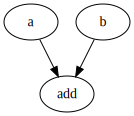

In [3]:
graph2 = tf.Graph()

with graph2.as_default():
    a = tf.constant([5, 2], name='a')
    b = tf.constant([3, 7], name='b')
    c = a + b
    
    with tf.Session() as sess:
        print('Output: {}'.format(sess.run(c)))
        
visualize_graph(graph2)

### Interactive Session

In [4]:
sess = tf.InteractiveSession()

In [5]:
sess

In [6]:
x = tf.constant(5)
x.eval()

5

In [7]:
sess.close()

### Placeholders

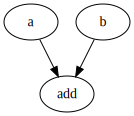

In [8]:
graph3 = tf.Graph()

with graph3.as_default():
    a = tf.placeholder(tf.int32, name='a')
    b = tf.placeholder(tf.int32, name='b')
    c = a + b
        
visualize_graph(graph3)

In [9]:
def run_graph(input_a, input_b, graph):
    with tf.Session(graph=graph) as sess:
        output = sess.run(c, feed_dict={a: input_a,
                                        b: input_b})
        return output

In [10]:
run_graph(1, 2, graph3)

3

In [11]:
run_graph([1, 2], [3, 4], graph3)

array([4, 6], dtype=int32)

In [12]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])
run_graph(matrix_a, matrix_b, graph3)

array([[ 6,  8],
       [10, 12]], dtype=int32)

### Placeholders

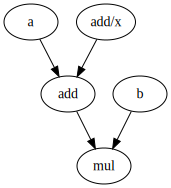

In [13]:
graph4 = tf.Graph()

with graph4.as_default():
    a = tf.placeholder(tf.int32, name='a')
    b = tf.placeholder(tf.int32, name='b')
    c = (1 + a) * b
        
visualize_graph(graph4)

In [14]:
run_graph(1, 2, graph4)

4

In [15]:
run_graph([1, 2], [3, 4], graph4)

array([ 6, 12], dtype=int32)

In [16]:
run_graph([[1, 2], [3, 4]], [[5, 6], [7, 8]], graph4)

array([[10, 18],
       [28, 40]], dtype=int32)

### Variable

3


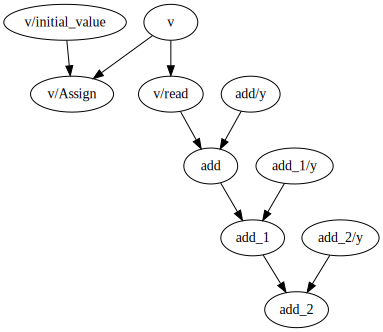

In [17]:
graph5 = tf.Graph()

with graph5.as_default():
    v = tf.Variable(0, name='v')
    
    with tf.Session() as sess:
        sess.run(v.initializer)
        for _ in range(3):
            v += 1
            
        print(sess.run(v))
    
visualize_graph(graph5)

## Perceptron

In [445]:
class PerceptronWithTF:
    def __init__(self, epochs, learning_rate=1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.graph = None
    
    def visualize_graph(self):
        return visualize_graph(self.graph)
    
    @staticmethod
    def _print_training_output(w, y_hat, e):
        y_hat_value = int(y_hat[0][0])
        e_value = int(e[0][0])
        w1 = int(w[0][0])
        w2 = int(w[1][0])
        b = int(w[2][0])
        format_string = 'y_hat: {:+d} , e= {:+d} , w: [{:+d}, {:+d}, {:+d}]'
        format_values = [y_hat_value, e_value, w1, w2, b]
        output = format_string.format(*format_values)
        print(output)
    
    def fit_online(self, xs, ys):
        self.graph = tf.Graph()
        with self.graph.as_default():
            w_init = tf.zeros((3, 1))
            w = tf.Variable(w_init, dtype=tf.float32, name='w')
            x = tf.placeholder(tf.float32, name='x')
            y = tf.placeholder(tf.float32, name='y')
            y_hat = tf.sign(tf.matmul(w, x, transpose_a=True))
            e = y - y_hat
            delta_w = tf.matmul(x, e)
            w = tf.assign(w, w + delta_w)

        with tf.Session(graph=self.graph) as sess:
            init = tf.global_variables_initializer()
            sess.run(init)

            for epoch in range(self.epochs):
                if epoch > 0:
                    print()
                print('Epoch {}'.format(epoch + 1))
                for x_, y_ in zip(xs, ys):
                    x_ = np.append(x_, 1)[:, None]
                    y_ = y_[:, None]
                    output = sess.run([w, y_hat, e], feed_dict={x: x_, y: y_})
                    self._print_training_output(*output)

## Online perceptron

In [446]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)

### OR

In [447]:
y_or = np.array([[-1], [1], [1], [1]], dtype=np.float32)

In [448]:
perceptron = PerceptronWithTF(epochs=3)
perceptron.fit_online(x, y_or)

Epoch 1
y_hat: +0 , e= -1 , w: [+0, +0, -1]
y_hat: -1 , e= +2 , w: [+0, +2, +1]
y_hat: +1 , e= +0 , w: [+0, +2, +1]
y_hat: +1 , e= +0 , w: [+0, +2, +1]

Epoch 2
y_hat: +1 , e= -2 , w: [+0, +2, -1]
y_hat: +1 , e= +0 , w: [+0, +2, -1]
y_hat: -1 , e= +2 , w: [+2, +2, +1]
y_hat: +1 , e= +0 , w: [+2, +2, +1]

Epoch 3
y_hat: +1 , e= -2 , w: [+2, +2, -1]
y_hat: +1 , e= +0 , w: [+2, +2, -1]
y_hat: +1 , e= +0 , w: [+2, +2, -1]
y_hat: +1 , e= +0 , w: [+2, +2, -1]


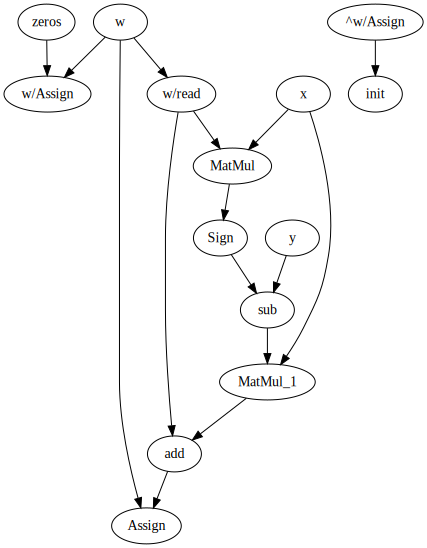

In [449]:
perceptron.visualize_graph()

### AND

In [450]:
y_and = np.array([[-1], [-1], [-1], [1]], dtype=np.float32)

In [451]:
perceptron = PerceptronWithTF(epochs=6)
perceptron.fit_online(x, y_and)

Epoch 1
y_hat: +0 , e= -1 , w: [+0, +0, -1]
y_hat: -1 , e= +0 , w: [+0, +0, -1]
y_hat: -1 , e= +0 , w: [+0, +0, -1]
y_hat: -1 , e= +2 , w: [+2, +2, +1]

Epoch 2
y_hat: +1 , e= -2 , w: [+2, +2, -1]
y_hat: +1 , e= -2 , w: [+2, +0, -3]
y_hat: -1 , e= +0 , w: [+2, +0, -3]
y_hat: -1 , e= +2 , w: [+4, +2, -1]

Epoch 3
y_hat: -1 , e= +0 , w: [+4, +2, -1]
y_hat: +1 , e= -2 , w: [+4, +0, -3]
y_hat: +1 , e= -2 , w: [+2, +0, -5]
y_hat: -1 , e= +2 , w: [+4, +2, -3]

Epoch 4
y_hat: -1 , e= +0 , w: [+4, +2, -3]
y_hat: -1 , e= +0 , w: [+4, +2, -3]
y_hat: +1 , e= -2 , w: [+2, +2, -5]
y_hat: -1 , e= +2 , w: [+4, +4, -3]

Epoch 5
y_hat: -1 , e= +0 , w: [+4, +4, -3]
y_hat: +1 , e= -2 , w: [+4, +2, -5]
y_hat: -1 , e= +0 , w: [+4, +2, -5]
y_hat: +1 , e= +0 , w: [+4, +2, -5]

Epoch 6
y_hat: -1 , e= +0 , w: [+4, +2, -5]
y_hat: -1 , e= +0 , w: [+4, +2, -5]
y_hat: -1 , e= +0 , w: [+4, +2, -5]
y_hat: +1 , e= +0 , w: [+4, +2, -5]


### XOR

In [452]:
y_xor = np.array([[-1], [1], [1], [-1]], dtype=np.float32)

In [456]:
perceptron = PerceptronWithTF(epochs=3)
perceptron.fit_online(x, y_xor)

Epoch 1
y_hat: +0 , e= -1 , w: [+0, +0, -1]
y_hat: -1 , e= +2 , w: [+0, +2, +1]
y_hat: +1 , e= +0 , w: [+0, +2, +1]
y_hat: +1 , e= -2 , w: [-2, +0, -1]

Epoch 2
y_hat: -1 , e= +0 , w: [-2, +0, -1]
y_hat: -1 , e= +2 , w: [-2, +2, +1]
y_hat: -1 , e= +2 , w: [+0, +2, +3]
y_hat: +1 , e= -2 , w: [-2, +0, +1]

Epoch 3
y_hat: +1 , e= -2 , w: [-2, +0, -1]
y_hat: -1 , e= +2 , w: [-2, +2, +1]
y_hat: -1 , e= +2 , w: [+0, +2, +3]
y_hat: +1 , e= -2 , w: [-2, +0, +1]
